In [1]:
#-*- coding: UTF-8 -*-
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
chrome_path = r'C:\Users\kikun\Desktop\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)

In [2]:
import os
import re
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import scipy as sci
os.chdir('C:\Users\kikun\Desktop\watcha data')
os.getcwd()
%matplotlib inline

In [3]:
driver.get('http://www.watcha.net')

In [4]:
driver.find_element_by_xpath('''//*[@id="contents"]/div[3]/div[2]/span[2]/a''').click()

In [6]:
elem = driver.find_element_by_id('user_email')
elem.send_keys("ghk829@hanmail.net")
elem = driver.find_element_by_id('user_password')
elem.send_keys('90qwnmas7')
elem.submit()

In [7]:
elem = driver.find_element_by_id('input-query')
elem.send_keys('love')
elem.submit()

In [35]:
for i in range(1,10000):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [36]:
from bs4 import BeautifulSoup as BT
import urllib2
soup = BT(driver.page_source)
datas = soup.findAll('div',attrs={'class':'search-footer'})

In [37]:
href = list()
for i in range(len(datas)):
    href.append(datas[i].find('a')['href'])
original = list()
for i in range(len(datas)):
    original.append('https://watcha.net')
for i in range(len(datas)):
    original[i] = original[i] + href[i]    

In [ ]:
#####################################################################################
# for get the distribution of datas

In [ ]:
names = list()
rt = list()
for i in range(len(href)):
    print str(i+1)+'th'
    print re.split('/',original[i])[-2]
    r = urllib2.urlopen(original[i])
    soup = BT(r)
    data = soup.find('div',attrs={'class':'rating-chart-wrapper'})['data-distribution']
    dt=re.findall(':[^"|^,|^}]{1,6}',data)
    index= range(1,11)
    score = list()
    names.append(re.split('/',original[i])[-2]+'.csv')
    text = soup.find('div',attrs={'class':'desc'}).getText()
    time = re.split(',',text)[-1]
    if len(re.split('\W',time)) == 6 : rt.append(int(re.split('\W',time)[1])*60+int(re.split('\W',time)[4])) 
    else : rt.append('no_rt')
    for d in dt:
        score.append(int(re.split(':',d)[-1]))
        watcha=DataFrame(score,range(1,len(score)+1))
        watcha.to_csv(re.split('/',original[i])[-2]+'.csv')
    print 'complete~'

In [ ]:
###################################################################################################################
# for Regression model

In [38]:
names = list()
rt = list()
score = list()
for i in range(len(href)):
    print str(i+1)+'th'
    print re.split('/',original[i])[-2]
    r = urllib2.urlopen(original[i])
    soup = BT(r)
    names.append(re.split('/',original[i])[-2])
    text = soup.find('div',attrs={'class':'desc'}).getText()
    time = re.split(',',text)[-1]
    if len(re.split('\W',time)) == 6 : rt.append(int(re.split('\W',time)[1])*60+int(re.split('\W',time)[4])) 
    else : rt.append(0)
    sc = soup.find('span',attrs={'class':'number'}).getText()
    score.append(float(sc))
    print 'finish~~'

1th
patutigi-love-and-peace-2007
finish~~
2th
jia-mian-raida-kabuto-god-2006
finish~~
3th
mo-ninguniang-xin-chun-2002
finish~~
4th
plastic-love-2015
finish~~
5th
love-orchestra-2012
finish~~
6th
love-actually-2003
finish~~
7th
bancangggo-2012
finish~~
8th
love-letter-1995
finish~~
9th
reobeupigsyeon-2011
finish~~
10th
love-2012
finish~~
11th
g-love-2011
finish~~
12th
love-1999
finish~~
13th
rosie-2014
finish~~
14th
eumcikeulrinig-2012
finish~~
15th
a-love-2007
finish~~
16th
love-now-2007
finish~~
17th
almost-love-2006
finish~~
18th
love-affair-1994
finish~~
19th
my-love-2007
finish~~
20th
love-story-1970
finish~~
21th
purpose-of-love-2005
finish~~
22th
love-song-1998
finish~~
23th
all-for-love-2005
finish~~
24th
love-and-other-drugs-2010
finish~~
25th
love-so-divine-2004
finish~~
26th
balcighan-geunyeo-2014
finish~~
27th
nayi-sarang-nayi-sinbu-2014
finish~~
28th
the-scent-of-love-2003
finish~~
29th
fair-love-2009
finish~~
30th
love-phobia-2006
finish~~
31th
shakespeare-in-love-1998
fin

In [104]:
d=DataFrame({'running_time':rt,'score':score},index=names)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
d.shape[0]
random_state = d.shape[0]

In [112]:
random_state = d.shape[0]
x = d['running_time'].get_values() ; y=d['score'].get_values()
d = d[d.ix[:,0]>0]
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(d)

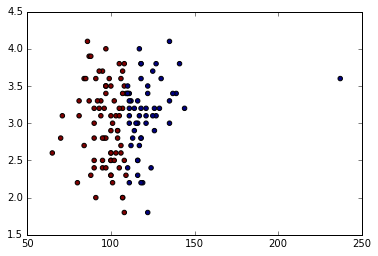

In [113]:
plt.scatter(x,y,c=y_pred)

In [21]:
slope = sci.stats.linregress(x,y)
p1=sci.polyfit(x,y,1) ;p1

array([  2.51601462e-03,   2.78177406e+00])

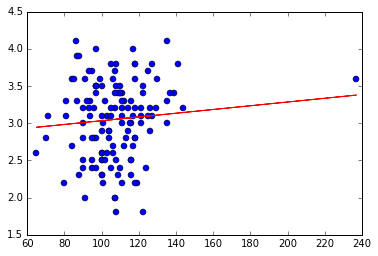

In [114]:
plt.plot(x,y,'o')
plt.plot(x,sci.polyval(p1,x),'r-')

{'boxes': [<matplotlib.lines.Line2D at 0x21c406d8>],
 'caps': [<matplotlib.lines.Line2D at 0x21c4e438>,
 'fliers': [<matplotlib.lines.Line2D at 0x21c5c4e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x21c4ef28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x21c40898>,
  <matplotlib.lines.Line2D at 0x21c40e80>]}

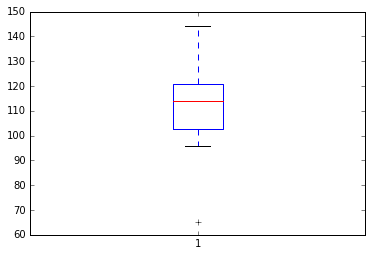

In [17]:
plt.boxplot(x)

(array([ 1.,  5.,  2.,  2.,  4.,  7.,  1.,  1.,  1.,  2.]),
 array([ 2.2 ,  2.39,  2.58,  2.77,  2.96,  3.15,  3.34,  3.53,  3.72,
         3.91,  4.1 ]),
 <a list of 10 Patch objects>)

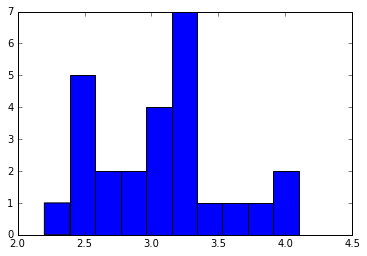

In [19]:
plt.hist(y)

In [97]:
#####################################################
# Getting the data

In [53]:
data1=pd.read_csv('state-of-play-2009.csv',names=['score']).ix[1:]

In [54]:
data1=data1/data1.apply(sum)

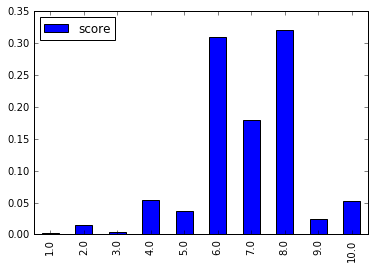

In [55]:
data1.plot(kind='bar')

In [336]:
plt.show()

In [56]:
k = 0 
for i in range(1,11):
    k+=data1.index[i-1] * data1.ix[i]

ValueError: could not convert string to float: score

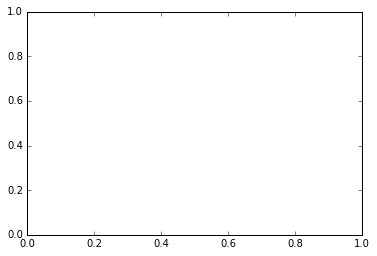

In [57]:
plt.plot(k)

In [58]:
k=list()
for i in range(1,11):
    k+=[int(data1.index[i-1])]*int(data1.ix[i])

In [59]:
import seaborn as sns


In [333]:
plt.show()

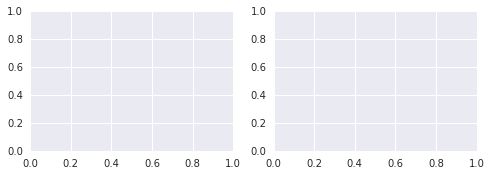

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2,2,2)

ValueError: zero-size array to reduction operation minimum which has no identity

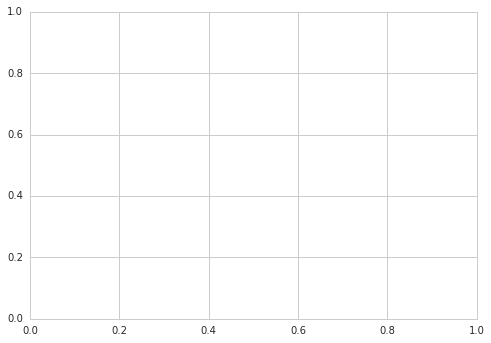

In [61]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(k), bw=0.3)

In [ ]:
data1.plot(kind='bar')

In [ ]:
ax1.sns.